#Instrucciones:

Con la base de datos de Sexism Detection in English Texts se deben realizar los siguientes pasos.

1. Seleccione una muestra aleatoria de 1000, deje una semilla con random_state:
       datos_muestra=datos.sample(1000, random_state=su_cedula).
2. Cree una columna con la etiqueta del análisis de sentimiento ¿cuál es el sentimiento más frecuente? y realice un gráfico para visualizar cuál es el sentimiento que se asocia a una mayor proporción de textos sexistas.
3. Cree una columna con las entidades que crea pertinentes en este contexto, comente sobre las entidades más frecuentes.
4. Cree una columna donde realice una limpieza: como pasar a minúsculas, eliminando stop words, eliminar símbolos, entre otros y cree un gráfico para visualizar las palabras más frecuentes.
5. Implemente el algoritmo de LDA y determine el número de tópicos con este algoritmo, justifique, muestre la frecuencia de los tópicos y comente.
6. Cree la etiqueta de tópicos y visualice cuál es el tópico qué tiene una mayor proporción de textos sexistas. Dicho tópico visualice las palabras de este tópico, comente ¿qué observa?

In [30]:
!pip install googletrans==4.0.0-rc1
!pip install unidecode
!pip install pyLDAvis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [31]:
#Importamos las librerías
from google.colab import drive # conectar con datos de drive
drive.mount('/content/gdrive')
from googletrans import Translator # libreria para traducir
import pandas as pd # manejo de data frame
import numpy as np # manejos matriciales
import nltk # paquete 1 de lenguaje natural
import spacy # paquete 2 de lenguaje natural
import re # paquete 2 de lenguaje natural
from textblob import TextBlob  #
from unidecode import unidecode
import seaborn as sns # graficos
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords # conjunto de stopwords
from nltk.tokenize import TweetTokenizer # tokenizador de tweet
from nltk.stem import PorterStemmer # hacer steming palabras
from nltk.stem import LancasterStemmer # hacer steming palabras
from nltk.stem import WordNetLemmatizer # extraer el lema de una palabra
import matplotlib.pyplot as plt
from transformers import pipeline
from wordcloud import WordCloud  # graficos de palabras
from transformers import MarianMTModel, MarianTokenizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('words')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('vader_lexicon')
# from translate import Translator
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import (KMeans, AgglomerativeClustering, DBSCAN)
from sklearn.decomposition import PCA # Análisis de componentes principales
from scipy.cluster.hierarchy import dendrogram,  linkage # Dendograma
from sklearn.metrics import silhouette_score, pairwise_distances_argmin_min
from gensim import corpora
from gensim.models import LdaModel,CoherenceModel
import pyLDAvis
import pyLDAvis.gensim_models
import gensim

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [32]:
#Cargamos la base de datos
datos = pd.read_csv('/content/gdrive/MyDrive/Aprendizaje no supervisador para el analisis de datos /Bases de datos/dev.csv')
datos.head()
datos.dropna()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,rewire_id,text,label_sexist,label_category,label_vector,split
0,sexism2022_english-9609,"In Nigeria, if you rape a woman, the men rape ...",not sexist,none,none,dev
1,sexism2022_english-966,I bet she wished she had a gun,not sexist,none,none,dev
2,sexism2022_english-3553,I agree with that but at the same time I know ...,sexist,2. derogation,2.1 descriptive attacks,dev
3,sexism2022_english-13328,democrats from Minnesota (leftist muzzie shith...,sexist,2. derogation,2.2 aggressive and emotive attacks,dev
4,sexism2022_english-81,Texas jury sentences Jordanian immigrant to de...,not sexist,none,none,dev
...,...,...,...,...,...,...
1995,sexism2022_english-6672,The future is female guys,not sexist,none,none,dev
1996,sexism2022_english-12605,Dude do not ever text a girl something like th...,not sexist,none,none,dev
1997,sexism2022_english-10008,I cum really hard from anal & clitoral stimula...,not sexist,none,none,dev
1998,sexism2022_english-17035,Oooh that hurt kind like that Jewish girl who ...,not sexist,none,none,dev


In [33]:
#1. Seleccionar una muestra aleatoria de 1000 tweets, con semilla (random_state)
datos_muestra=datos.sample(1000, random_state=1001652413)
datos_muestra.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,rewire_id,text,label_sexist,label_category,label_vector,split
246,sexism2022_english-11649,For some women you _will_ be ugly. Just avoid ...,not sexist,none,none,dev
132,sexism2022_english-2711,"imagine messaging women, dumbass",not sexist,none,none,dev
428,sexism2022_english-15354,LPT: If you sit on your hand for a couple of m...,not sexist,none,none,dev
1723,sexism2022_english-10459,Where are the real Swedes?,not sexist,none,none,dev
1447,sexism2022_english-9492,/pol/ is eating the shit up thanks for the con...,not sexist,none,none,dev


In [34]:
!pip install tqdm # install the tqdm package
from tqdm import tqdm # import the tqdm functio

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [35]:
#2. Cree una columna con la etiqueta del análisis de sentimiento ¿cuál es el sentimiento más frecuente? y realice un gráfico para visualizar cuál es el sentimiento que se asocia a una mayor proporción de textos sexistas.
sia = SentimentIntensityAnalyzer()

#Función para obtener la etiqeuta del sentimiento
def obtener_sentimiento(texto):
  scores = sia.polarity_scores(texto)['compound']
  if scores > 0:
    return 'positivo'
  elif scores < 0:
    return 'negativo'
  else:
    return 'neutral'

#Crea la columna con la etiqueta de sentimiento
datos_muestra['sentimiento'] = datos_muestra['text'].apply(obtener_sentimiento)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [36]:
datos_muestra["sentimiento"].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count
sentimiento,
negativo,507
positivo,343
neutral,150


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


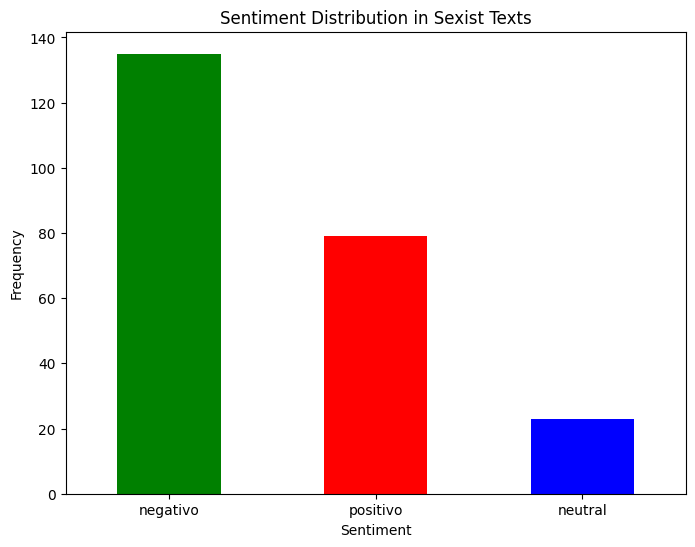

In [37]:
datos_muestra = datos_muestra[datos_muestra['label_sexist'] == 'sexist']
plt.figure(figsize=(8, 6))
datos_muestra ['sentimiento'].value_counts().plot(kind='bar', color=['green', 'red', 'blue'])
plt.title("Sentiment Distribution in Sexist Texts")
plt.xlabel("Sentiment")
plt.ylabel("Frequency")
plt.xticks(rotation=0)
plt.show()

**Respuesta:**
- El sentimiento que más se repite en la muestra es el negatico, lo que quiere decir, que predominan los sexistas.

In [49]:
#3. Cree una columna con las entidades que crea pertinentes en este contexto, comente sobre las entidades más frecuentes
nlp = spacy.load("en_core_web_sm") # lectura del modelo
def extraer_entidades(texto):
  """
  """
  doc = nlp(texto)
  entidades=[] # entidades
  for ent in doc.ents:
    if ent.label_ == "ORG" or ent.label_ == "GPE" or ent.label_ == "PERSON" or ent.label_ == "NORP" or ent.label_ == "PRODUCT" or ent.label_ == "EVENT":
      entidades.append(ent.text)
  entidades=','.join(entidades)
  return entidades

datos_muestra['entidades'] = datos_muestra['text'].apply(extraer_entidades)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [50]:
datos_muestra.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,rewire_id,text,label_sexist,label_category,label_vector,split,sentimiento,entidades
456,sexism2022_english-10198,They get everyday what i wish i could get once...,sexist,2. derogation,2.2 aggressive and emotive attacks,dev,negativo,
1082,sexism2022_english-13016,Yes. Ban thots.,sexist,2. derogation,2.2 aggressive and emotive attacks,dev,negativo,
1459,sexism2022_english-10881,Not our fault she chose to date an abusive scu...,sexist,4. prejudiced discussions,4.1 supporting mistreatment of individual women,dev,negativo,
1559,sexism2022_english-13731,MGTOW is not about all women being evil bitche...,sexist,3. animosity,"3.1 casual use of gendered slurs, profanities,...",dev,negativo,MGTOW
1605,sexism2022_english-12041,Good times? It sounds like this bitch shat on ...,sexist,3. animosity,"3.1 casual use of gendered slurs, profanities,...",dev,positivo,


In [51]:
datos_muestra['entidades'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count
entidades,
,163
Chad,4
Hillary,2
American,2
Walkaway,1
...,...
roofie,1
muslim,1
"Jews,ANYthing",1


**Respuesta:**
- Las entidades que más se repiten con son Chad, Hillary y American. Puden representar personas del gobierno americano de los que se está hablando

In [52]:
#4.Cree una columna donde realice una limpieza: como pasar a minúsculas, eliminando stop words, eliminar símbolos, entre otros y cree un gráfico para visualizar las palabras más frecuentes.
# Descargar stopwords
nltk.download('stopwords')
stop_words_nltk_en = list(set(nltk.corpus.stopwords.words('english')))
stop_words_nltk_en = ["u", "c",*stop_words_nltk_en]

# Función para limpiar el texto
def texto_limpio(texto):
    texto = texto.lower()  # Pasar a minúsculas
    texto = re.sub(r'http\S+', '', texto)  # Eliminar URLs
    texto = re.sub(r'[^A-Za-z\s]', '', texto)  # Eliminar símbolos
    tokens = texto.split()  # Tokenización
    tokens = [w for w in tokens if w not in stop_words_nltk_en]  # Eliminar stop words
    return ' '.join(tokens)

# Crear la columna de texto limpio
datos_muestra['texto_limpio'] = datos_muestra['text'].apply(texto_limpio)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [53]:
datos_muestra.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,rewire_id,text,label_sexist,label_category,label_vector,split,sentimiento,entidades,texto_limpio
456,sexism2022_english-10198,They get everyday what i wish i could get once...,sexist,2. derogation,2.2 aggressive and emotive attacks,dev,negativo,,get everyday wish could get girls looking flir...
1082,sexism2022_english-13016,Yes. Ban thots.,sexist,2. derogation,2.2 aggressive and emotive attacks,dev,negativo,,yes ban thots
1459,sexism2022_english-10881,Not our fault she chose to date an abusive scu...,sexist,4. prejudiced discussions,4.1 supporting mistreatment of individual women,dev,negativo,,fault chose date abusive scumbag
1559,sexism2022_english-13731,MGTOW is not about all women being evil bitche...,sexist,3. animosity,"3.1 casual use of gendered slurs, profanities,...",dev,negativo,MGTOW,mgtow women evil bitches servant human doesnt ...
1605,sexism2022_english-12041,Good times? It sounds like this bitch shat on ...,sexist,3. animosity,"3.1 casual use of gendered slurs, profanities,...",dev,positivo,,good times sounds like bitch shat repeatedly u...


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


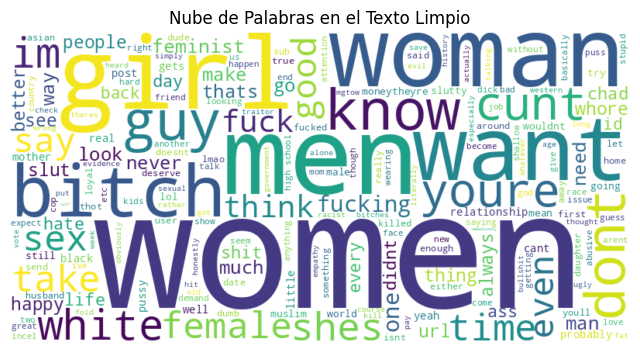

In [54]:
#Visualizaresmo las palabras más frecuentes en una nube de palabras
from wordcloud import WordCloud

# Unir todo el texto limpio en una sola cadena
texto_completo = ' '.join(datos_muestra['texto_limpio'])

# Generar la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_completo)

# Graficar la nube de palabras
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Quitar los ejes
plt.title('Nube de Palabras en el Texto Limpio')
plt.show()

In [64]:
#5. Implemente el algoritmo de LDA y determine el número de tópicos con este algoritmo, justifique, muestre la frecuencia de los tópicos y comente.
count_vectorizer = CountVectorizer(min_df=10,ngram_range=(1, 2))
X_count = count_vectorizer.fit_transform(datos_muestra["texto_limpio"])
count_vectorizer.get_feature_names_out()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['also', 'bitch', 'cunt', 'dont', 'even', 'fuck', 'fucking', 'get',
       'girl', 'girls', 'go', 'good', 'guys', 'im', 'know', 'like', 'men',
       'much', 'never', 'one', 'shes', 'take', 'thats', 'time', 'want',
       'white', 'woman', 'women', 'would', 'youre'], dtype=object)

In [65]:
datos_muestra["texto_limpio"]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,texto_limpio
456,get everyday wish could get girls looking flir...
1082,yes ban thots
1459,fault chose date abusive scumbag
1559,mgtow women evil bitches servant human doesnt ...
1605,good times sounds like bitch shat repeatedly u...
...,...
1507,thats mugshot looks damn happy knows suck way ...
103,didnt actually get day without women im little...
36,false accuser registry deserve get raped thoug...
723,geldof annoyed nigger kill whites bet killed h...


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

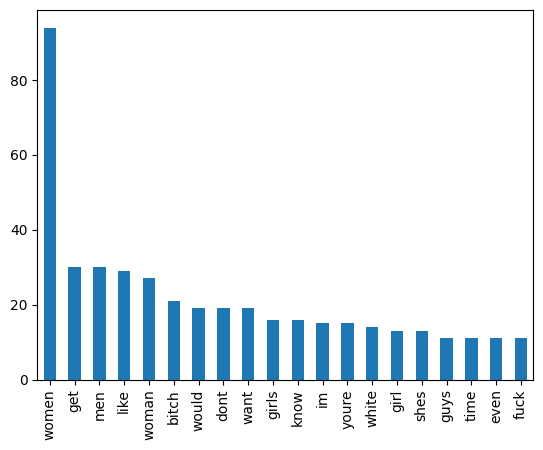

In [66]:
datos_count=pd.DataFrame(X_count.toarray(), columns=count_vectorizer.get_feature_names_out())
datos_count.sum().sort_values(ascending=False).iloc[0:20].plot(kind="bar")

In [67]:
count_vectorizer = CountVectorizer(min_df=10)
X_count = count_vectorizer.fit_transform(datos_muestra["texto_limpio"])
count_vectorizer.get_feature_names_out()
datos_muestra["tokens"]=datos_muestra["texto_limpio"].apply(lambda x: x.split())
datos_muestra["tokens"]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,tokens
456,"[get, everyday, wish, could, get, girls, looki..."
1082,"[yes, ban, thots]"
1459,"[fault, chose, date, abusive, scumbag]"
1559,"[mgtow, women, evil, bitches, servant, human, ..."
1605,"[good, times, sounds, like, bitch, shat, repea..."
...,...
1507,"[thats, mugshot, looks, damn, happy, knows, su..."
103,"[didnt, actually, get, day, without, women, im..."
36,"[false, accuser, registry, deserve, get, raped..."
723,"[geldof, annoyed, nigger, kill, whites, bet, k..."


In [68]:
# Crear un diccionario y un corpus
dictionary = corpora.Dictionary([count_vectorizer.get_feature_names_out() ])
corpus = [dictionary.doc2bow(text.split()) for text in datos_muestra["texto_limpio"]]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [69]:
corpus

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[(4, 1), (7, 3), (9, 1), (12, 1), (15, 1), (27, 2)],
 [],
 [],
 [(11, 1), (27, 1)],
 [(1, 1), (3, 1), (11, 2), (15, 2), (23, 1)],
 [(7, 2), (24, 1)],
 [],
 [(18, 1)],
 [(1, 1), (28, 1)],
 [(26, 1), (29, 1)],
 [(17, 1), (21, 1), (28, 1)],
 [(27, 1)],
 [(1, 1), (10, 1), (21, 1)],
 [],
 [(3, 1), (27, 1)],
 [(12, 1), (21, 1), (26, 1)],
 [(9, 1), (11, 1), (27, 1), (28, 1)],
 [(0, 1), (27, 1), (29, 1)],
 [(27, 1)],
 [(15, 1), (24, 1)],
 [(2, 1), (5, 1), (6, 1), (15, 1), (22, 1)],
 [],
 [(18, 1)],
 [],
 [(25, 1)],
 [(27, 1)],
 [(26, 1), (28, 1)],
 [(6, 1), (7, 1), (10, 1), (14, 1), (19, 1), (25, 1)],
 [],
 [(2, 1)],
 [(3, 1), (27, 1), (28, 1)],
 [(7, 2), (15, 1)],
 [(1, 1), (7, 1), (10, 1), (14, 1), (17, 1), (24, 1), (28, 1)],
 [(12, 1), (20, 1), (28, 1)],
 [(7, 1), (13, 1)],
 [(16, 1)],
 [(3, 1), (18, 1), (26, 1)],
 [(1, 1), (18, 1)],
 [(27, 1)],
 [(17, 1), (27, 2)],
 [(4, 1), (7, 1)],
 [(7, 1), (15, 1), (16, 1), (24, 1), (27, 1)],
 [],
 [(16, 1), (27, 1), (28, 1)],
 [(18, 1), (19, 1)],
 [(

In [70]:
coherence_values = [] # parametro determinar tópicos
model_list = {} # modelos de tópicos
topicos_num= range(2,10)
for num_topics in topicos_num:
    model = gensim.models.LdaModel(corpus=corpus,
                                    id2word=dictionary,
                                    num_topics=num_topics,
                                    random_state=100,
                                    update_every=1,
                                    chunksize=100,
                                    passes=10,
                                    alpha='auto',
                                    per_word_topics=True)
    model_list[num_topics] = model
    coherencemodel = CoherenceModel(model=model, texts=datos_muestra["tokens"], dictionary=dictionary, coherence='c_v')
    coherence_values.append(coherencemodel.get_coherence())


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


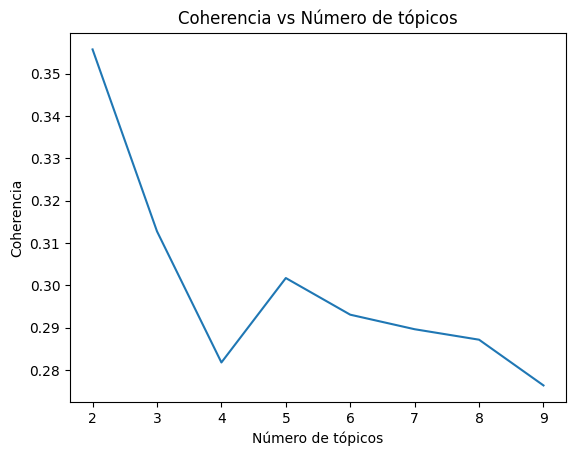

In [71]:
x = range(2,10)
plt.plot(x, coherence_values)
plt.xlabel("Número de tópicos")
plt.ylabel("Coherencia")
plt.title("Coherencia vs Número de tópicos")
plt.show()

In [75]:
# Visualización interactiva
vis = pyLDAvis.gensim_models.prepare(model_list[3], corpus, dictionary)
pyLDAvis.display(vis)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [76]:
topics = model_list[3].print_topics(num_words=10)
for topic in topics:
    print(topic)

(0, '0.411*"women" + 0.131*"men" + 0.103*"like" + 0.064*"want" + 0.060*"im" + 0.051*"know" + 0.051*"dont" + 0.044*"also" + 0.028*"get" + 0.016*"fuck"')
(1, '0.157*"bitch" + 0.153*"woman" + 0.107*"youre" + 0.101*"girls" + 0.072*"thats" + 0.061*"fucking" + 0.061*"one" + 0.056*"go" + 0.055*"fuck" + 0.043*"like"')
(2, '0.162*"get" + 0.120*"would" + 0.113*"girl" + 0.105*"white" + 0.070*"shes" + 0.062*"time" + 0.056*"never" + 0.055*"much" + 0.048*"even" + 0.045*"take"')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Análisis:**
- Basandonos en el gráfico de coherencia vs número de topicos el número de recomendado de topicos es de 2, pero se decisio probar con otros números de tipocos para obtener el más indicado
- Al momendo de visualizar los 3 topicos en el gráfico interactivo podemos ver las separación de los topicos es bantante buena y la distribución de los topicos es constante.

In [77]:
#6. Cree la etiqueta de tópicos y visualice cuál es el tópico qué tiene una mayor proporción de textos sexistas. Dicho tópico visualice las palabras de este tópico, comente ¿qué observa?
document_topics = model_list[3].get_document_topics(corpus)
dominant_topics = []
for doc_topics in document_topics:
    # Ordenar los tópicos por probabilidad y tomar el de mayor valor
    dominant_topic = max(doc_topics, key=lambda x: x[1])[0]  # x[1] es la probabilidad, x[0] es el ID del tópico
    dominant_topics.append(dominant_topic)
datos_muestra["dominant_topic"] = dominant_topics

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [78]:
datos_muestra["dominant_topic"].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count
dominant_topic,
0,132
2,54
1,51


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


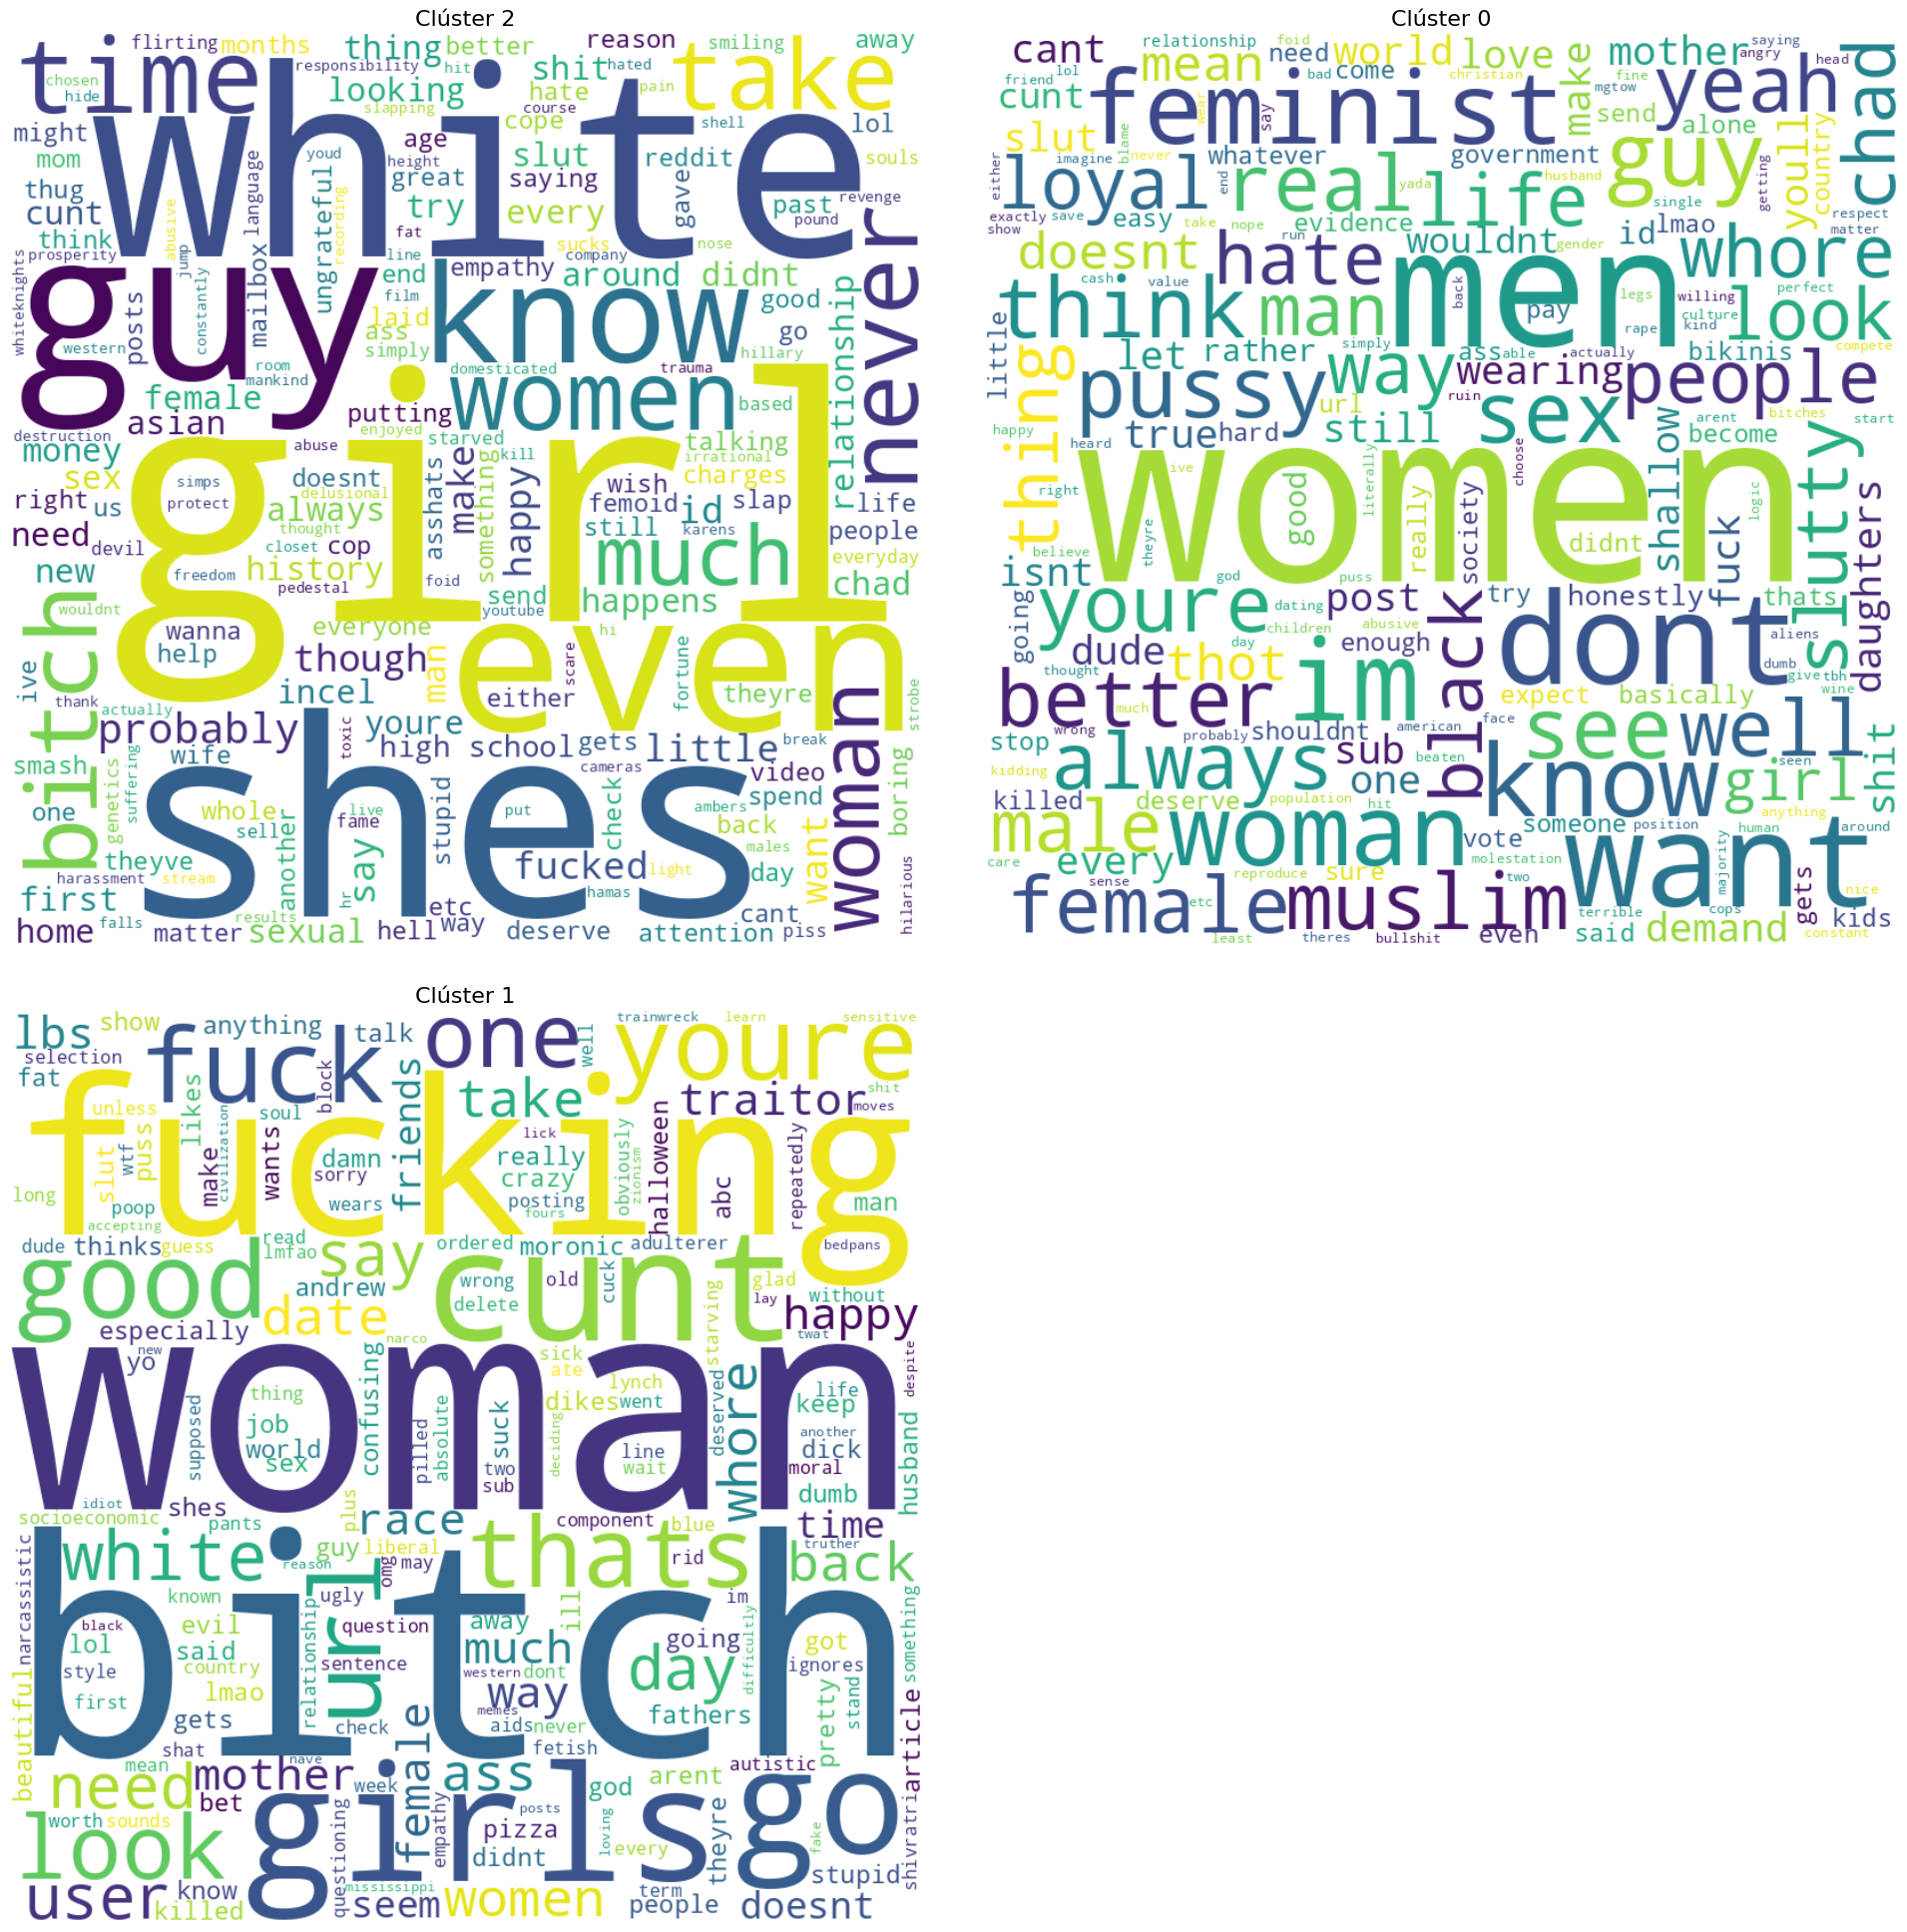

In [81]:
import math
# Obtener los valores únicos de labels_kmeans
labels_unicos = datos_muestra["dominant_topic"].unique()

# Definir el número de filas y columnas
num_columnas = 2
num_filas =  math.ceil(len(labels_unicos) / num_columnas)  # Calcular el número de columnas necesarias


# Crear la figura y los subplots
fig, axes = plt.subplots(num_filas, num_columnas, figsize=(20, 20))  # Ajustar el tamaño total del gráfico
axes = axes.flatten()  # Aplanar el array de ejes para un fácil acceso

# Generar una nube de palabras por cada valor único en labels_kmeans
for i, label in enumerate(labels_unicos):
    # Unir los textos que corresponden al label actual
    filtro_cluster=datos_muestra["dominant_topic"] == label
    texto_join = " ".join(datos_muestra.loc[filtro_cluster, "texto_limpio"])

    # Crear la nube de palabras
    wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(texto_join)

    # Mostrar la nube de palabras en el subplot correspondiente
    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].axis("off")
    axes[i].set_title(f"Clúster {label}", fontsize=16)

# Eliminar cualquier subplot vacío (si los hay)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar el layout
plt.tight_layout(pad=3)
plt.show()

**Análisis:**
- Las palabras que más se destacan en el clúster 2 son white, guy, girl, time, she's.
- Esto podría indicar que habla de relaciones y de roles de genero, especialente en un contexto racial el tener el termino white.
- Puede reflejar estereotipo entre hombres y mujeres sobre sus roles de genero.

- El clúster 0 tiene como palabras principales women, feminist, pussy, men, sex, muslim.
- Parece que se centra el feminismo negativo, debido a la agresividad de las palabras, además, puede estar relacionado con prejuicios o perpectivas de la religión musulmana.

- La palabras que más se repiten en el clúster 1 son women, fucking, bitch, cunt.
- Este cluster tiene un lenguaje incluso más agresivo que el anterior hacia las mujeres denotando el tono negativo en las palabras.
- Puede estar relacionado con temas de acoso, o temas de odio y desprecio hacia las mujeres